<a href="https://colab.research.google.com/github/neerajguleria1/driver-drowsiness-detection/blob/main/Day19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Driver Data Preview


,Driver,Speed,Mileage,Alertness,Efficiency,Performance,SafetyLevel,RiskFactor
0,Neeraj,120,33,0.5,27.500000,Effecient,Highly safe,0
1,Sujal,553,6,1.9,1.084991,Needs Improvement,unsafe,1
2,Arpit,66,22,0.6,33.333333,Effecient,Highly safe,0
3,Nishant,322,7,0.2,2.173913,Needs Improvement,Moderate,1
4,Amit,66,14,0.6,21.212121,Effecient,Highly safe,0


,Total Drivers,Avg Speed,Avg Mileage,Avg Mileage(Risky Drivers),Unsafe Drivers
0,5,225.4,16.4,6.5,0.0


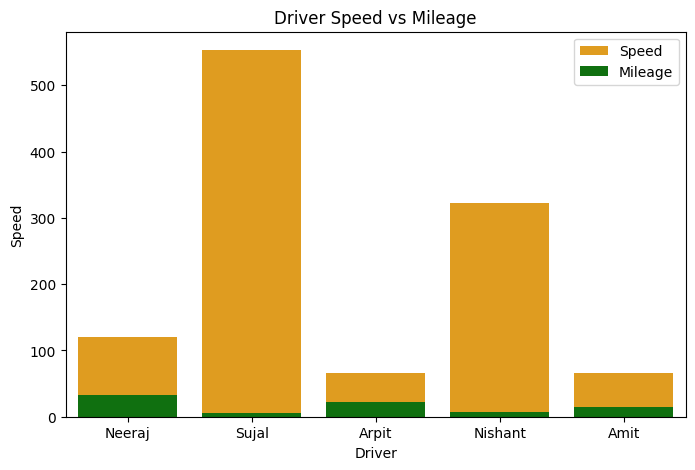

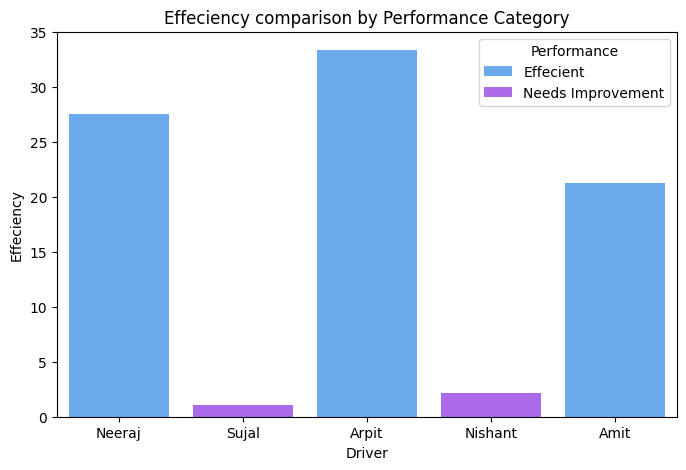

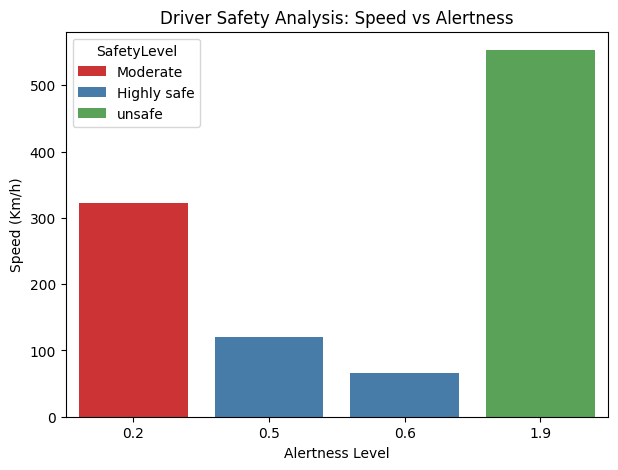

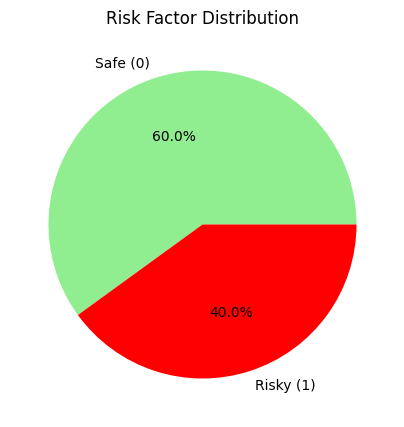

image saved


<Figure size 640x480 with 0 Axes>

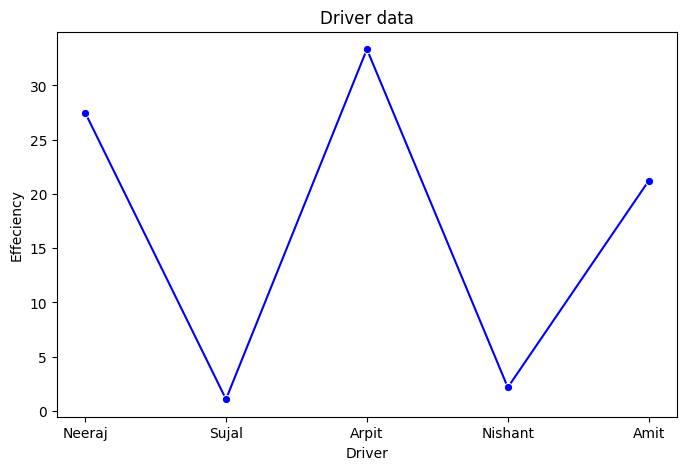

In [26]:
#Interactive dashboard-style analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("driver_analysis.csv")
summary=pd.read_csv("driver_summary.csv")

print("Driver Data Preview")
display(df.head())
display(summary)

plt.figure(figsize=(8,5))
sns.barplot(x='Driver',y='Speed',data=df,color='orange',label='Speed')
sns.barplot(x='Driver',y='Mileage',data=df,color='green',label='Mileage')
plt.title('Driver Speed vs Mileage')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Driver',y='Efficiency',hue='Performance',data=df,palette='cool')
plt.title("Effeciency comparison by Performance Category")
plt.xlabel("Driver")
plt.ylabel("Effeciency")
plt.show()

plt.figure(figsize=(7,5))
sns.barplot(x='Alertness',y='Speed',hue='SafetyLevel',data=df,palette='Set1')
plt.title("Driver Safety Analysis: Speed vs Alertness")
plt.xlabel("Alertness Level")
plt.ylabel("Speed (Km/h)")
plt.show()

riskCount=df['RiskFactor'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(riskCount,labels=['Safe (0)','Risky (1)'],autopct='%1.1f%%',colors=['lightgreen','red'])
plt.title("Risk Factor Distribution")
plt.show()

plt.savefig("driver_dashboard_overview.png")
print("image saved")

plt.figure(figsize=(8,5))
sns.lineplot(x='Driver',y='Efficiency',data=df,marker='o',color='blue')
plt.xlabel("Driver")
plt.ylabel("Effeciency")
plt.title("Driver data")
plt.show()

In [3]:
'''Combine Pandas and NumPy operations in one workflow

Use vectorized calculations (fast, no loops)

Apply functions row-wise for complex logic

Prepare datasets for ML models'''

import pandas as pd
import numpy as np

data={
    'Driver':['Neeraj','Sujal','Arpit','Nishant','Amit'],
    'Speed':[120,553,66,322,66],
    'Mileage':[33,6,22,7,14],
    'Alertness':[0.5,1.9,0.6,0.2,0.6]
}
df=pd.DataFrame(data)


mean_speed=np.mean(df['Speed'])
std_dev=np.std(df['Mileage'])
df['Efficiency']=df['Mileage']/(df['Speed']/100)
df['Performance']=np.where(df['Efficiency']>10,'Effecient','Needs Improvement')


def classify_driver(row):
  if row['Speed']>250 and row['Alertness']>0.8:
    return 'unsafe'
  elif row['Alertness']<0.7 and row['Speed']<249:
    return 'Highly safe'
  else:
    return 'Moderate'

df['SafetyLevel']=df.apply(classify_driver,axis=1)


df['RiskFactor']=np.where(df['Speed']>200,1,0)
avg_mil_risky=df[df['RiskFactor']==1]['Mileage'].mean()
unsafe_drivers=df[df['SafetyLevel']=='Unsafe']
percent_unsafe=(len(unsafe_drivers)/len(df))*100

summary={
    'Total Drivers':len(df),
    'Avg Speed':round(df['Speed'].mean(),2),
    'Avg Mileage':round(df['Mileage'].mean(),2),
    'Avg Mileage(Risky Drivers)':round(avg_mil_risky,2),
    'Unsafe Drivers':round(percent_unsafe,1)
}
summary_df=pd.DataFrame([summary])

df.to_csv("driver_analysis.csv",index=False)
summary_df.to_csv("driver_summary.csv",index=False)
print("\n Driver analysis and driver summary saved successfully")


 Driver analysis and driver summary saved successfully
